<a href="https://colab.research.google.com/github/sahiliit/APR_assignment1/blob/main/APR_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from datasets import load_dataset

# Load dataset from Hugging Face
dataset = load_dataset("cwchang/text-classification-dataset-example")

# Show dataset info
print(dataset)
print(dataset['train'][0])   # first training example


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/81.0 [00:00<?, ?B/s]

train.json: 0.00B [00:00, ?B/s]

validation.json: 0.00B [00:00, ?B/s]

test.json: 0.00B [00:00, ?B/s]

Generating train split:   0%|          | 0/15000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7500 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['label', 'text', 'id'],
        num_rows: 15000
    })
    validation: Dataset({
        features: ['label', 'text', 'id'],
        num_rows: 3000
    })
    test: Dataset({
        features: ['label', 'text', 'id'],
        num_rows: 7500
    })
})
{'label': 'book_flight', 'text': 'i need you to book me a flight from ft lauderdale to houston on southwest', 'id': 'train-0'}


In [4]:
# Extract text and labels from train/test splits
train_texts = [x['text'] for x in dataset['train']]
train_labels = [x['label'] for x in dataset['train']]

test_texts = [x['text'] for x in dataset['test']]
test_labels = [x['label'] for x in dataset['test']]

print("Sample text:", train_texts[0])
print("Sample label:", train_labels[0])


Sample text: i need you to book me a flight from ft lauderdale to houston on southwest
Sample label: book_flight


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert raw text into numeric vectors
vectorizer = TfidfVectorizer(
    max_features=5000,
    stop_words="english"
)

X_train = vectorizer.fit_transform(train_texts)
X_test = vectorizer.transform(test_texts)

print("Shape of training features:", X_train.shape)


Shape of training features: (15000, 4802)


In [6]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(
    max_iter=1000,
    solver='lbfgs',
    multi_class='auto'
)

clf.fit(X_train, train_labels)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='auto')

In [12]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
y_pred = clf.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(test_labels, y_pred))

# Detailed classification report
print("\nClassification Report:\n", classification_report(test_labels, y_pred))



Accuracy: 0.8126666666666666

Classification Report:
                            precision    recall  f1-score   support

      accept_reservations       0.78      0.76      0.77        50
          account_blocked       0.66      0.88      0.75        50
                    alarm       0.96      0.94      0.95        50
       application_status       0.87      0.96      0.91        50
                      apr       0.98      0.94      0.96        50
            are_you_a_bot       0.90      0.90      0.90        50
                  balance       0.72      0.76      0.74        50
             bill_balance       0.73      0.64      0.68        50
                 bill_due       0.49      0.34      0.40        50
              book_flight       0.91      0.80      0.85        50
               book_hotel       0.87      0.90      0.88        50
               calculator       0.84      0.84      0.84        50
                 calendar       0.78      0.64      0.70        50
       

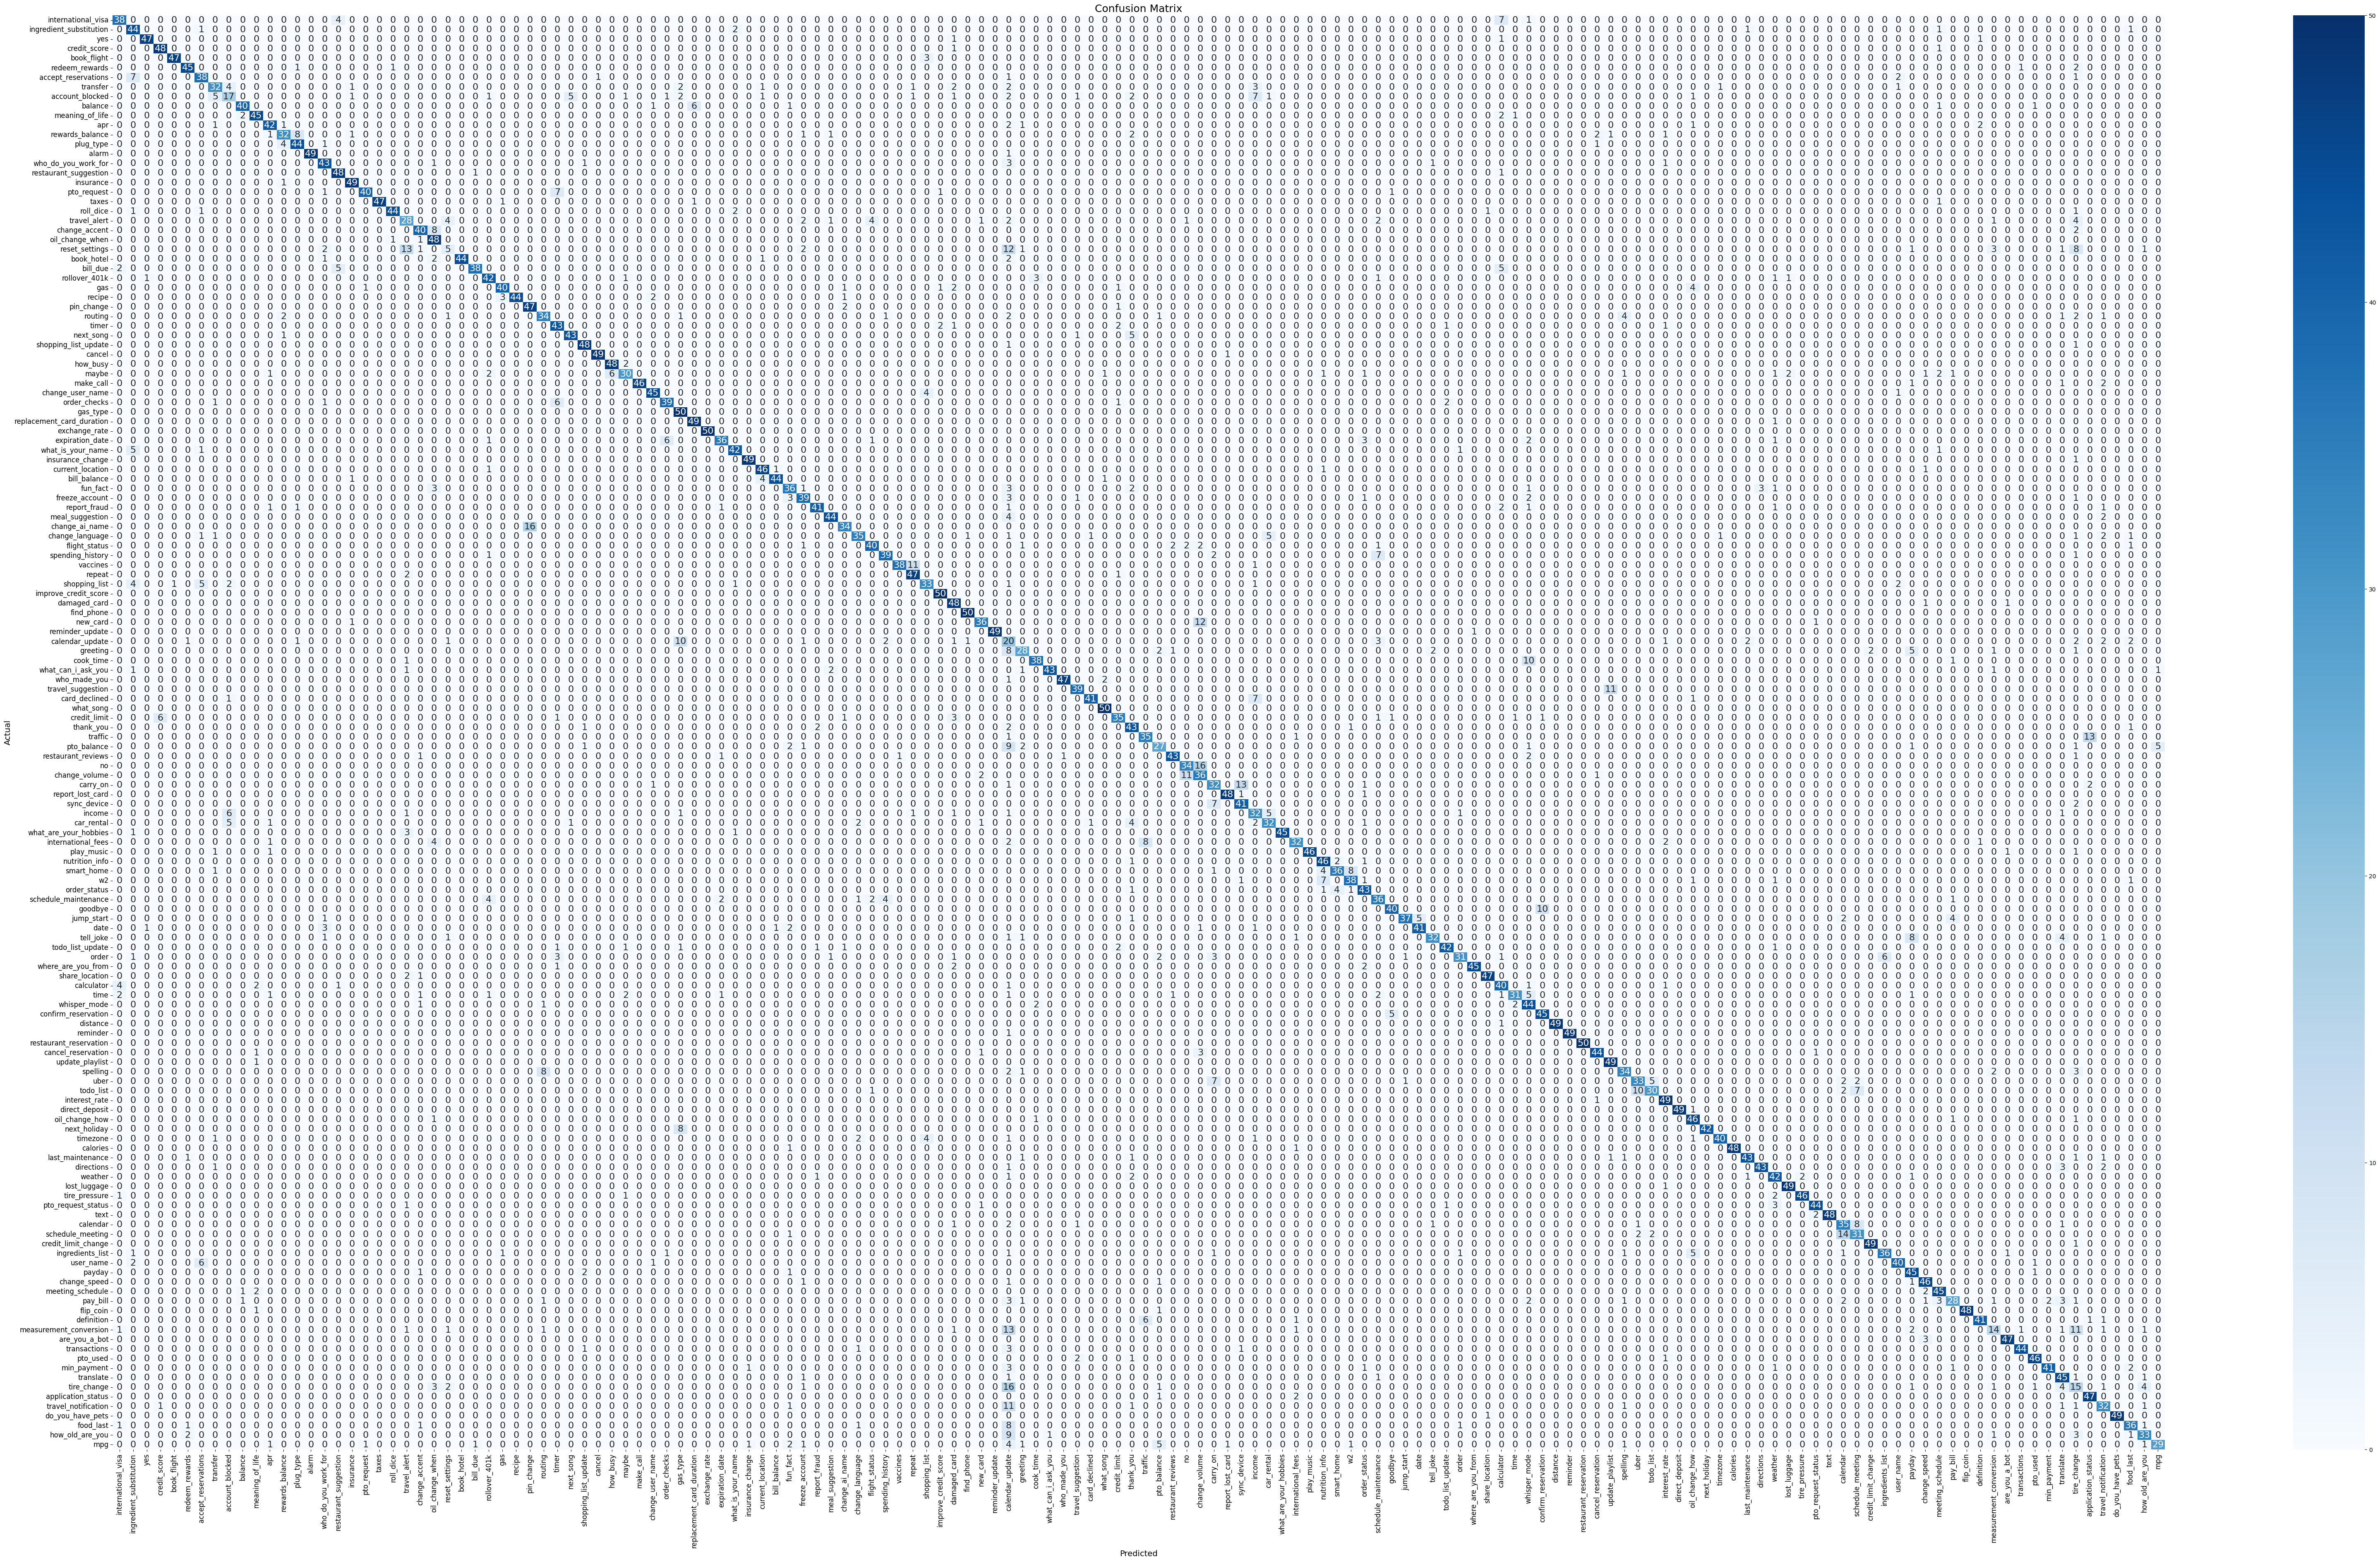

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(test_labels, y_pred)

plt.figure(figsize=(80,45))   # Bigger size
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap="Blues",
    xticklabels=set(train_labels),
    yticklabels=set(train_labels),
    annot_kws={"size":16}   # Bigger numbers
)

plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.title("Confusion Matrix", fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
